# Stochastische variabelen genereren

Voor deze opdracht moeten we de door onszelf geschreven random number generator gebruiken om stochastische variabelen uit een kansverdeling te genereren.

Ik heb hierbij gekozen voor de normaalverdeling als kansverdeling.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Allereerst definiëren we opnieuw de in de eerdere opdracht behandelde random number generator. Deze zal gebruikt worden om uiteindelijk een kansverdeling te genereren.

In [2]:
class PseudoRandomGen(object):
    """
    implements a lagged Fibonacci generator (LFG)
    """
    def __init__(self, seed, opp: str="+", j: int=3, k: int=7, m: int=10):
        # check for requirements of j and k
        assert 0 < j < k
        
        # check the requirements of the seed
        self.seed = str(seed)
        assert len(self.seed) >= k
        
        if opp == "+":
            self.opp = lambda x, y : x + y
        elif opp == "-":
            self.opp = lambda x, y : x - y
        elif opp == "*":
            self.opp = lambda x, y : x * y
        else:
            raise Exception('operation is not supported')
            
        self.seed = np.array(list(map(int, self.seed)))
        self.j = j
        self.k = k
        self.m = m
    
    def gen_random(self):
        """"""
        new_int = self.opp(self.seed[self.j - 1], self.seed[self.k - 1]) % self.m
        self.seed = np.append(self.seed[1:], new_int)
        if new_int == 0:
            new_int = 1
        return new_int
    
    def gen_random_sample(self, n):
        """"""
        result = []
        for x in range(n):
            result.append(self.gen_random())
        return result

## Box-Muller transform

The Box-Muller transform is een methode voor het genereren van een normaalverdeling vanuit een uniforme verdeling.  
Deze methode pakt twee sets van onafhankelijke willekeurige getallen tussen 0 en 1 ($u_1$ en $u_2$) en zet deze om tot twee onafhankelijke willekeurige sets van getallen met een standaard normaalverdeling ($z_1$ en $z_2$).  
De methode gebruikt hiervoor de volgende twee formules:  

$z_1 = \sqrt{-2 ln(u_1)} cos(2\pi u_2)$  
$z_2 = \sqrt{-2 ln(u_1)} sin(2\pi u_2)$

bronnen:
- https://glowingpython.blogspot.com/2013/01/box-muller-transformation.html
- https://theclevermachine.wordpress.com/2012/09/11/sampling-from-the-normal-distribution-using-the-box-muller-transform/

Allereerst bouwen we de functie voor deze omzetting en laten deze los op twee sets van getallen die gegenereert zijn met behulp van de eigen gecreeërde RNG.

In [3]:
# transformation function
def gaussian(u1,u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

In [4]:
new_rd = PseudoRandomGen(6421893, m=101)

u1 = np.array(new_rd.gen_random_sample(10000)) / 100
u2 = np.array(new_rd.gen_random_sample(10000)) / 100

In [5]:
z1, z2 = gaussian(u1, u2)

Om erachter te komen of er een standaard verdeling gecreeërd wordt plotten we de originele sets van getallen en de resultaten na de transformatie.

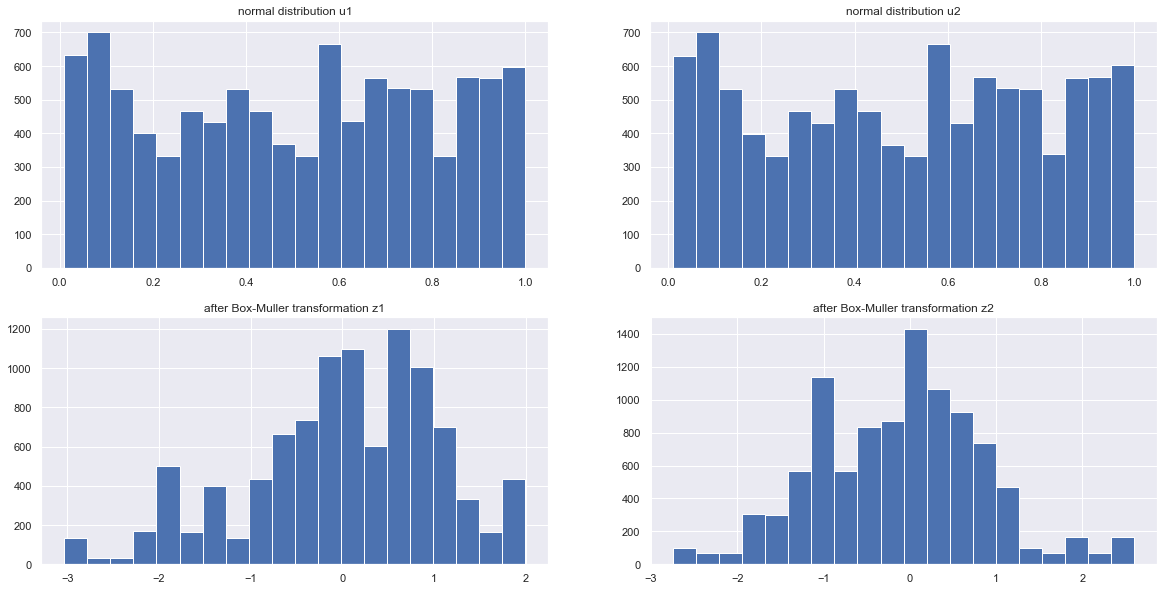

In [6]:
# sns.distplot(z1, bins= 20)
sns.set()

# plotting the values before and after the transformation
plt.figure(figsize=(20,10))

# the first row of graphs
plt.subplot(221)
plt.hist(u1, bins=20)
plt.title('normal distribution u1')

plt.subplot(222)
plt.hist(u2, bins=20)
plt.title('normal distribution u2')

# the second row of graphs with the histograms of z1 and z2
plt.subplot(223)
plt.hist(z1, bins=20)
plt.title('after Box-Muller transformation z1')

plt.subplot(224)
plt.hist(z2, bins=20)
plt.title('after Box-Muller transformation z2')

plt.show()

Om erachter te komen of de functie voldoet testen we dit ook met de ingebouwde RNG van numpy zelf.

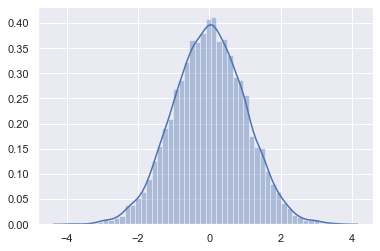

In [7]:
z1, z2 = gaussian(np.random.random_sample(10000), np.random.random_sample(10000))
sns.distplot(z2)